# Data: Past, Present, Future
# Lab 11 AI without the ML; 3 types of ML; first take on *ethics*

## Part 1: AI without the ML

>"History makes the present strange"
>-- James Grimmelman, after a talk about this class, Feb. 2018

One of the most valuable things about history is pointing out how things could have been, as they say, the other way. For example, today AI and ML (machine learning) are used nearly interchangably. It was not at all clear in the early days of AI that successes in AI would come from machines that learn in the presence of data. One idea, in part inspired by WWII crypto, was heuristic-empowered search. That is, many problems in life can be abstracted as search problems, in which the space of possible results is quite large. One early meaning of heuristics was rules and procedures that would help limit the search space to a few viable candidate best responses or solutions.

To build "AI" we need only create an algorithm that imitates a natural intelligence -- not an algorithm whose performance improves when presented with additional data (the latter being one of the canonical definitions of machine learning, which we will get to soon).

To help illustrate the diversity of research in AI during the 1950-1973 period, let's look at the chat program [Eliza](https://en.wikipedia.org/wiki/ELIZA)

> ELIZA is an early natural language processing computer program created from 1964 to 1966[1] at the MIT Artificial Intelligence Laboratory by Joseph Weizenbaum
> --Wikipdedia

First let's try Eliza, then look at the [source code.](https://github.com/nltk/nltk/blob/develop/nltk/chat/eliza.py)

Eliza is so canonical it is included as part of [NLTK](https://en.wikipedia.org/wiki/Natural_Language_Toolkit), so the "import antigravity" for this exercise is:

In [0]:
import nltk

In [0]:
nltk.chat.eliza.demo()


Therapist
---------
Talk to the program by typing in plain English, using normal upper-
and lower-case letters and punctuation.  Enter "quit" when done.
Hello.  How are you feeling today?
>All is darkness and I can't go outside.
Why do you say that all is darkness and you can't go outside?
>Because
How does that make you feel?
>Bad
I see.
>Blue is yellow
Why do you say that blue is yellow?
>I wish I were happy
Please tell me more.
>quit
Thank you for talking with me.


Eliza is one of several chatbots in NLTK. For fun, try some of these--of check out how the code works.

You might also enjoy reading it in the near-original [Lisp](https://en.wikipedia.org/wiki/Lisp_(programming_language%29), as coded by [Peter Norvig](https://en.wikipedia.org/wiki/Peter_Norvig) [here](https://github.com/norvig/paip-lisp/blob/master/lisp/eliza1.lisp)


You may remember the character *Groot* from the Marvel "Universe". 
![groot](https://akns-images.eonline.com/eol_images/Entire_Site/2014817/rs_1024x759-140917065659-1024.Groot-JR-91714.jpg?fit=inside|900:auto&output-quality=90) 

[Groot](https://en.wikipedia.org/wiki/Groot#%22I_am_Groot%22) has limited lexical complexity. Colloquy with Groot takes this form, taken from Guardians of the Galaxy, part II:

>When Yondu and Rocket find themselves in the mutineering Ravagers' brig, they enlist Baby Groot's help to get Yondu's prototype fin. It doesn't go well.

>The following conversation ensues:

>Yondu: "What? No!"

>Rocket: "He thinks you want him to wear it as a hat."

>Yondu: "That's not what I said!"

>Groot: "I am Groot."

>Rocket: "He's relieved that you don't want him to."

>Groot: "I am Groot."

>Rocket: "He hates hats."

>Groot: "I am Groot."

>Rocket: "On anyone, not just himself."

>Groot: "I am Groot."

>Rocket: "You see someone and think they have a weird head and then it just turns out part of their head is a hat. That's why you don't like hats?"

Let's look at the code for Eliza in python. 

Consider this bit of code from Eliza. How might you make an Groot chatbot?


     pair=
     (r'Why can\'t I (.*)',
       ( "Do you think you should be able to %1?",
         "If you could %1, what would you do?",
         "I don't know -- why can't you %1?",
     "Have you really tried?")




The appearance of *originality* was central to the concerns of the early figures of AI. How does the code for Eliza build in something to give some appearance of a non-mechanical quality?

Find the "respond" function in the code common to all these bots.

[chat utility](https://github.com/nltk/nltk/blob/develop/nltk/chat/util.py)

# Expert Systems: the example of Mycin


> "MYCIN is the original expert system that made it evident to all the rest of the world that a new niche had opened up. . . . MYCIN epitomized the new path that had been created."--Allen Newell


## The problem

> The "antimicrobial revolution" began with the introduction of the sulfonamides in the 1930s and penicillin in 1943. The beneficial effects that these and subsequent drugs have had on humanity cannot be overstated. However, as early as the 1950s it became clear that antibiotics were being misused. A study of office practice involving 87 general practitioners (Peterson et al., 1956) revealed that antibiotics were given indiscriminately to all patients with upper respiratory infections by 67% of the physicians, while only 33% ever tried to separate viral from bacterial etiologies. 

So, the best expert knowledge in the medical profession wasn't in practice. What to do about this?

Expert system architecture:

![architecture](https://i.imgur.com/7cM8VqL.png)

In an expert system, knowledge engineers collaborate with domain experts to create by hand the "knowledge base" upon which the "inference engine operates." Rule 036, for example, in LISP and then in English reads:


>RULE036

>PREMISE: ($AND (SAME CNTXT GRAM GRAMNEG)

>               (SAME CNTXTM MORPH ROD)

>               (SAME CNTXT AIR ANAEROBIC))

>ACTION: (CONCLUDE CNTXT IDENTITY BACTEROIDES TALLY 0.6)

>IF: 1) The gram stain of the organism is gramneg, and

>    2) The morphology of the organism is rod, and

>    3) The aerobicity of the organism is anaerobic

>THEN: There is suggestive evidence (0.6) that the identity of the organism is *bacteroides*

"Suggestive evidence" is a subjective probability, a quantification of the beliefs of a medical expert.


Take a look at the code for the "knowledge base" portion of a python implementation of mycin.

https://github.com/dhconnelly/paip-python/blob/master/paip/examples/emycin/mycin.py



    def define_rules(sh):
        sh.define_rule(Rule(52,
                            [('site', 'culture', eq, 'blood'),
                             ('gram', 'organism', eq, 'neg'),
                             ('morphology', 'organism', eq, 'rod'),
                             ('burn', 'patient', eq, 'serious')],
                            [('identity', 'organism', eq, 'pseudomonas')],
                            0.4))
        sh.define_rule(Rule(71,
                            [('gram', 'organism', eq, 'pos'),
                             ('morphology', 'organism', eq, 'coccus'),
                             ('growth-conformation', 'organism', eq, 'clumps')],
                            [('identity', 'organism', eq, 'staphylococcus')],
                            0.7))
        sh.define_rule(Rule(73,
                            [('site', 'culture', eq, 'blood'),
                             ('gram', 'organism', eq, 'neg'),
                             ('morphology', 'organism', eq, 'rod'),
                             ('aerobicity', 'organism', eq, 'anaerobic')],
                            [('identity', 'organism', eq, 'bacteroides')],
                            0.9))
        sh.define_rule(Rule(75,
                            [('gram', 'organism', eq, 'neg'),
                             ('morphology', 'organism', eq, 'rod'),
                             ('compromised-host', 'patient', eq, True)],
                            [('identity', 'organism', eq, 'pseudomonas')],
                            0.6))
        sh.define_rule(Rule(107,
                            [('gram', 'organism', eq, 'neg'),
                             ('morphology', 'organism', eq, 'rod'),
                             ('aerobicity', 'organism', eq, 'aerobic')],
                            [('identity', 'organism', eq, 'enterobacteriaceae')],
                            0.8))
        sh.define_rule(Rule(165,
                            [('gram', 'organism', eq, 'pos'),
                             ('morphology', 'organism', eq, 'coccus'),
                             ('growth-conformation', 'organism', eq, 'chains')],
                            [('identity', 'organism', eq, 'streptococcus')],
                            0.7))
    


Can you find the rules hand-coded into the program?

Copy one and express it into English as above:

## Limits of Expert Systems and yet another AI winter

Jack Schwartz, appointed director of Information Systems Technology Office (ISTO) within DARPA. 

In his [1987 encylopedia entry "Limits of Artificial Intelligence"](https://archive.org/details/limitsofartifici00schw), he savaged existing AI. As for expert systems, well,

> Overall, we can say that expert systems enhance their pragmatic 
applicability by narrowing the traditional goals of artificial intelligence 
research substantially, and by blurring the distinction between clever 
specialized programming and use of unifying principles of self-organization 
applicable across a wide variety of domains. This makes their significance 
for future development of deeper artificial intelligence technologies entirely 
debatable in spite of their hoped-for pragmatic utility.

Schwartz "fell on" DARPA funded Expert Systems programs "like a rider out of the Apocalypse." (Roland, 205)



# Knowledge Acquisition Bottleneck and the limits of expert systems

Major problem: MYCIN took twenty person-years to produce just 475 rules (Roland)

>“Mastery is not acquired by reading books—it’s acquired by trial-and-error and teacher supplied examples. This is how humans acquire skill. People are very reluctant to accept this.  Their reluctance tells us something about the philosophical self image that we, as thinking beings, prefer. It tells us nothing about what actually happens when a teacher or a master trains somebody. That somebody has to regenerate rules from example to make them an intimate part of his intuitive skill.”  (Professor Donald Michie, “Expert Systems Interview,” Expert Systems 2, no. 1 (1985): 22.)

Machine learning often escapes just this problem: 

>the machine learning technique takes advantage of the data and avoids the knowledge acquisition bottleneck by extracting classification rules directly from data. Rather than asking an expert for domain knowledge, a machine learning algorithm observes expert tasks and induces rule emulating expert decisions. (Keki B. Irani et al., “Applying Machine Learning to Semiconductor Manufacturing,” IEEE Expert 8, no. 1 (1993): 41.)



# PART II
# 3 kinds of learning 2019-04-11

Prof. Wiggins will first lecture on the  [on 3 types of ML](https://github.com/data-ppf/data-ppf.github.io/blob/master/doc/Lab10aRL.pdf):
- unsupervised learning
- supervised learning
- reinforcement learning

If you missed lecture, download and follow along.
We'll explore all 3 in this notebook with some interactive widgets

*Credit: part 2 this lab originally written by Su Hang, CC*

In [0]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-poster'])

In [0]:
# since this is colab we don't need %matplotlib notebook


# Supervised Learning
## k Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
X  = np.random.uniform(low=-np.pi, high=np.pi, size=(100,1))
XT = np.random.uniform(low=-np.pi, high=np.pi, size=(100,1))

y  = np.sin(X ) + np.random.normal(scale=0.1, size=(100,1))
yT = np.sin(XT) + np.random.normal(scale=0.1, size=(100,1))

## let's try it first without "interact" python widget:

1.9409795606392768


Text(0, 0.5, 'y')

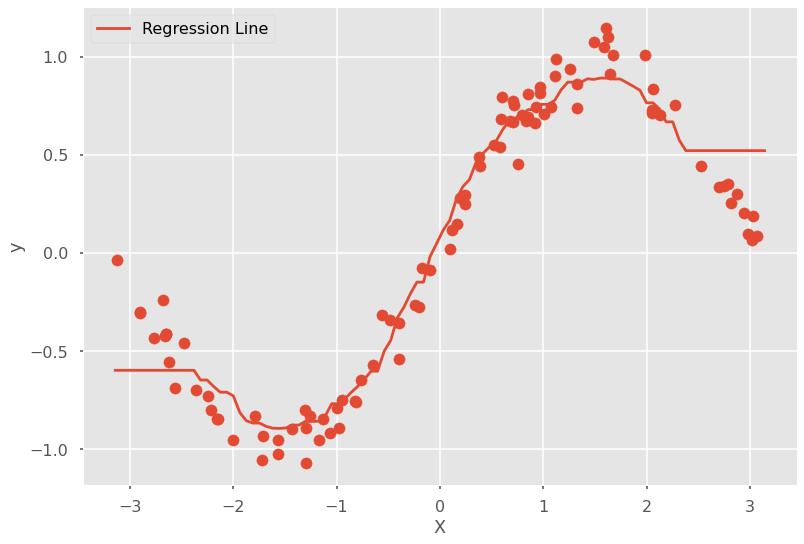

In [0]:
x=20;
try:
    axes.lines[0].remove()
except:
    pass
knr = KNeighborsRegressor(n_neighbors=x); 
knr.fit(X, y)
xs = np.linspace(-np.pi, np.pi, 100)[:, None]; ys = knr.predict(xs)
print(np.linalg.norm(knr.predict(XT)-yT))


fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(xs, ys, label='Regression Line')
axes.legend();
axes.scatter(X, y, label='Samples')
axes.set_xlabel('X')
axes.set_ylabel('y')

## try with the interaction

In [0]:
@interact(x=(1, 20))
def kNN(x=5):
    # use x as n_neighbors parameter
    try:
        axes.lines[0].remove()
    except:
        pass
    knr = KNeighborsRegressor(n_neighbors=x); knr.fit(X, y)
    xs = np.linspace(-np.pi, np.pi, 100)[:, None]; ys = knr.predict(xs)
    print(np.linalg.norm(knr.predict(XT)-yT))
    axes.plot(xs, ys, label='Regression Line')
    axes.legend()

interactive(children=(IntSlider(value=5, description='x', max=20, min=1), Output()), _dom_classes=('widget-int…

# Unsupervised Learning
## k Means

>Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. [Source](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) (wikipedia gives a more formal definition)


We'll need a dataset to play with. Let's try [Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher)'s 1936 [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), already mentioned a few weeks ago in class, as a classic.

In [0]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [0]:
# use 2 features from the iris dataset, just for fun
X = load_iris().data[:, :2]

## Complexity control in k-means

The central question in machine learning is how not to overfit data. In unsupervised learning, this might be, e.g., how many clusters we think the examples are grouped into. Let's call this number "K" for "komplexity". Let's try K=3 but go back and change this number to try different values

In [0]:
K=3;

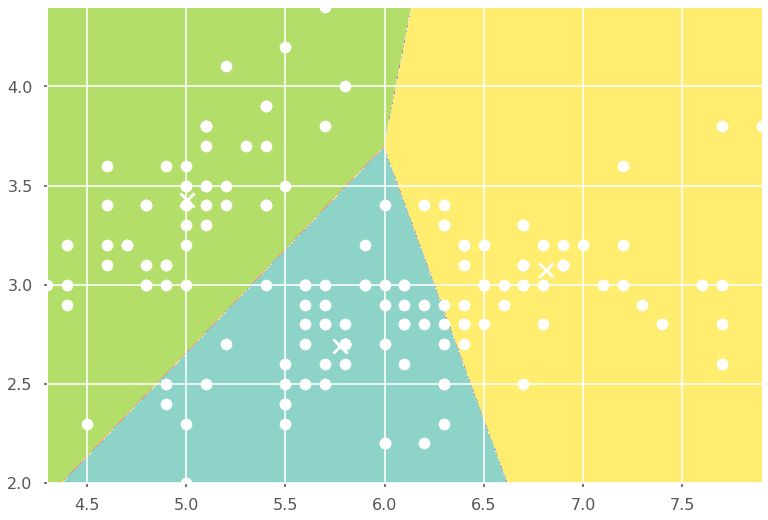

In [0]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.scatter(X[:, 0], X[:, 1], c='w')
km = KMeans(n_clusters=K); km.fit(X)
# plot what each region would be labelled as
x = np.linspace(X[:,0].min(), X[:,0].max(), 1000); y = np.linspace(X[:,1].min(), X[:,1].max(), 1000); 
xs, ys = np.meshgrid(x, y)
zs = km.predict(np.asarray([xs.flatten(), ys.flatten()]).T)
axes.imshow(zs.reshape(xs.shape), extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap=plt.cm.Set3)
# plot centroids
means = km.cluster_centers_
means_plot = axes.scatter(means[:,0], means[:,1], s=200, marker='x', c='w', linewidths=5)

# Reinforcement Learning

Reinforcement learning is *prescriptive* rather than descriptive or predictive. The goal is to make the right decision. 

Often these are in contexts where we have to learn how a system behaves while at the same time optimizing actions interacting with that system. It is sometimes said that we have a tradeoff between *explore* and *exploit* (or *explore* and *enjoy*!), by trying new things or doing the thing we know works well.

"$\epsilon$-greedy" is one simple example: do the thing you think is best most to the time but somestimes do a random thing to see how well it works

#  epsilon greedy

This section written by and used with permission of d.franceschi@columbia.edu

In [0]:
import random
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def egreedy(A, T, epsilon, R):

    # R = realizations
    rv = np.zeros(shape=(R,T))   
    rv_reward = np.zeros(shape=(R,1))
    rv_avg_reward = np.zeros(shape=(R,1))
    rv_avg = np.zeros(T)
    
    rv_regret = np.zeros(T)
    
    for s in range(R):

        #initializing a: arms which were pulled for t=1..T  
        a = np.zeros(T)

        #initializing r: cumulative reward for arm at
        r = np.zeros(A)

        #initializing rbar: avg reward for arm at
        rbar = np.zeros(A)

        #initializing ncount: number of times arm at was pulled
        ncount = np.zeros(A)

        #array of A arms from which we will pick randomly an arm epsilon % of the time
        Arms = np.arange(0, A, 1)

        for t in range(T):
            #epsilon greedy algorithm, taking random choice epsilon % of the time
            rand = np.random.random()
            if t == 0:
                at = random.choice(Arms)

            else:
                if rand < epsilon:
                    at = random.choice(Arms)
                #taking greedy action 1-epsilon % of the time    
                else: 
                    at = np.argmax(rbar)

            #calling true bandit
            reward = true_bandit2(A, theta_true2, at)


            #updating count, cumulative rewards, arm pulled, and avg reward
            ncount[at] += 1
            r[at]+=reward
            a[t] = at #indicating which arm it was at that iteration
            rbar[at] = r[at] / ncount[at]
            
            rv[s,t] = reward
            
        rv_reward[s] = np.sum(rv[s,:], axis=0)
        
        rv_avg_reward[s] = rv_reward[s]/T
        
    
    
    for t in range(T):        
        rv_avg[t] = ((np.sum(rv[:,t]))/R)
        rv_regret[t] = 0.75-rv_avg[t]
        
                       
    
    
    #plots
    #plotting average reward over time
    plt.plot(range(T),rv_avg)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Average Reward', fontsize=16)

    #regret 
    plt.figure()
    plt.plot(range(T),rv_regret)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Regret', fontsize=16)
    



In [0]:
#true thetas for each of A arms
theta_true2 = [0.1, 0.2, 0.2, 0.001, 0.25, 0.12, 0.18, 0.75, 0.1, 0.1]

def true_bandit2(A, theta_true2, at):
    
    
    #passing theta true for the particular arm that is being pulled, at
    #pull arm at, observe reward r for arm at
    r = bernoulli.rvs(size=1,p=theta_true2[at])

    return r



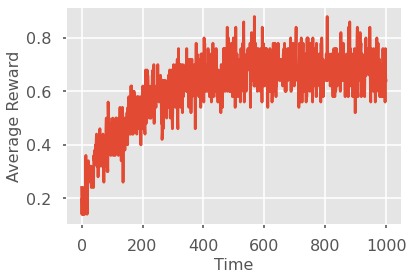

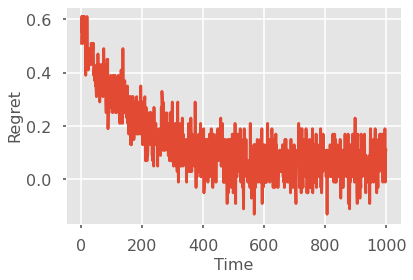

In [0]:
egreedy(10, 1000, 0.1, 50)

## Thompson Sampling

>Thompson sampling, ... is a heuristic for choosing actions that addresses the exploration-exploitation dilemma in the multi-armed bandit problem. It consists in choosing the action that maximizes the expected reward with respect to a randomly drawn belief." (h/t wikipedia)

In [0]:
def ts(x):
    # x is learning rate
    try:
        axes.lines[0].remove()
    except:
        pass
    theta_1 = 0.8 # true parameter for bernoulli arm 1
    theta_2 = 0.4 # true parameter for bernoulli arm 2
    regrets = [0] # keep track of regrets
    # initialise (beta) priors' parameters
    S_1, S_2 = 1, 1
    F_1, F_2 = 1, 1
    best_arm = 1 if theta_1 > theta_2 else 2
    for t in range(1000):
        theta_hat_1 = np.random.beta(S_1, F_1) # sample from prior 1
        theta_hat_2 = np.random.beta(S_2, F_2) # sample from prior 2
        arm = 1 if theta_hat_1 > theta_hat_2 else 2 # choose "better" arm
        # get reward, update priors' parameters        
        if arm == 1:
            reward = np.random.binomial(1, theta_1)
            S_1 += reward * x 
            F_1 += (1 - reward) * x
        else:
            reward = np.random.binomial(1, theta_2)
            S_2 += (reward) * x
            F_2 += (1 - reward) * x
        # record results
        regrets.append(1 * (best_arm != arm))
    # visualise
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel('t')
    axes.set_ylabel('regret')
    axes.plot(range(len(regrets)), np.cumsum(regrets))
    axes.set_title('Regret vs. time for Bernoulli Bandits, pseudocount='+ str(x))

##  try with different values

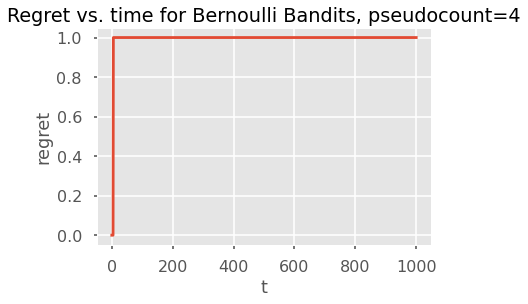

In [0]:
ts(4)

In [0]:
@interact(logx=(-5, 1))
def interact_ts(logx=-1):
    ts(np.exp(logx))

interactive(children=(IntSlider(value=-1, description='logx', max=1, min=-5), Output()), _dom_classes=('widget…

# Part III: The case of COMPAS

In a 2016 [article]("https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing") on Propublica, the authors announced, there's "software used across the country to predict future criminals. And it’s biased against blacks." The proprietary software in question was COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) that sought to provide judges and other officials predictions about recidivism based on a number of factors. Because the algorithm is proprietary, it is a commercial black box if not an epistemological one.

Combining records from freedom of information requests in Florida and arrest records, the team of journalists and data scientists used *supervised learning* to build a model capable of fairly accurately reproducing the predictions of the COMPAS algorithm.

Previously we've seen how *supervised learning* models the judgment of human experts without claiming to replicate their reasoning processes. Same thing here, but reproducing the products of a different algorithm.

A key result was:
>In forecasting who would re-offend, the algorithm made mistakes with black and white defendants at roughly the same rate but in very different ways.

>+ The formula was particularly likely to falsely flag black defendants as future criminals, wrongly labeling them this way at almost twice the rate as white defendants.
+ White defendants were mislabeled as low risk more often than black defendants.

Let's take a look at what that involves.

The team described its process in a detailed [blogpost]("https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm") and [notebook]("https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb"). 

Let's just reproduce a bit of what they did.


In [0]:
import pandas as pd
## h/t https://github.com/adebayoj/fairml for the easier to use data
# read in the propublica data, as made available by adebayoj
propublica_data = pd.read_csv("https://raw.githubusercontent.com/adebayoj/fairml/master/doc/example_notebooks/propublica_data_for_fairml.csv")


In [0]:
propublica_data[100:110]

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
100,1,0,0,0,1,1,0,0,0,0,0,0
101,1,28,1,0,0,1,0,0,0,0,0,0
102,0,1,1,0,0,1,0,0,0,0,0,1
103,0,1,0,0,0,0,0,0,0,1,1,0
104,1,13,1,0,0,0,0,0,0,0,0,0
105,1,3,1,0,0,1,0,0,0,0,0,0
106,0,3,1,1,0,0,0,0,0,0,0,1
107,1,19,1,0,0,1,0,0,0,0,0,0
108,0,6,0,0,0,0,0,0,0,0,0,0
109,0,2,0,0,0,0,0,0,0,0,1,0


In [0]:
# separate features for predicting and the ratings to predict
compas_rating = propublica_data.score_factor.values     # we've been calling this y
propublica_data = propublica_data.drop("score_factor", 1)  # we've been calling this X

In [0]:
# now we could do any kind of supervised learning model we want. They used logistic regression.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(propublica_data.values, compas_rating)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#or a decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(propublica_data.values, compas_rating)

In [0]:
relval = clf.feature_importances_

In [0]:
relval

array([0.04798867, 0.48612416, 0.06606706, 0.20896575, 0.04757639,
       0.0042431 , 0.02825946, 0.00176451, 0.02470681, 0.03792176,
       0.04638233])

In [0]:
import numpy as np 
propublica_data.columns
import matplotlib as plt

In [0]:
# horizontal bar plot of feature importance
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('Two_yr_Recidivism', 'Number_of_Priors', 'Age_Above_FourtyFive',
       'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic',
       'Native_American', 'Other', 'Female', 'Misdemeanor'))
plt.grid(True)

AttributeError: ignored

# so what?

Cynthia Rudin:

>ProPublica created a linear explanation model for COMPAS that depended on race, and then accused the black box COMPAS model of depending on race, conditioned on age and criminal history. In fact, COMPAS seems to be nonlinear, and it is entirely possible that COMPAS does not depend on race (beyond its correlations with age and criminal history). .  ProPublica’s linear model was not truly an “explanation” for COMPAS, and they should not have concluded that their explanation model uses the same important features as the black box it was approximating. [...] Let us stop calling approximations to black box model predictions explanations. For a model that does not use race explicitly, an automated explanation “This model predicts you will be arrested because you are black” is not an explanation of what the model is actually doing, and would be confusing to a judge, lawyer or defendant. 